In [1]:
import pandas as pd

# TODO: training/test could be generalized (eg we could train on random)

# training
df = pd.read_csv('x264-random100.csv')
df.head()


,--disable-avs,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash,--enable-lto,--enable-debug,--enable-gprof,--enable-strip,...,--bit-depth=10,--bit-depth=all,--chroma-format=400,--chroma-format=420,--chroma-format=422,--chroma-format=444,--chroma-format=all,binary-size,unit,nr-of-gadgets
0,False,False,False,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,3096112,bytes,106878
1,True,True,True,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,1704056,bytes,62065
2,False,True,True,True,False,False,False,True,True,False,...,False,False,False,False,True,False,False,3096112,bytes,106878
3,True,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,1718552,bytes,58537
4,True,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,3096112,bytes,106878


In [2]:
df.columns

Index(['--disable-avs', '--disable-swscale', '--disable-lavf',
       '--disable-ffms', '--disable-gpac', '--disable-lsmash', '--enable-lto',
       '--enable-debug', '--enable-gprof', '--enable-strip', '--enable-pic',
       '--disable-asm', '--enable-shared', '--enable-static',
       '--enable-bashcompletion', '--disable-cli', '--disable-bashcompletion',
       '--disable-opencl', '--disable-gpl', '--disable-thread',
       '--disable-win32thread', '--disable-interlaced', '--system-libx264',
       '--bit-depth=8', '--bit-depth=10', '--bit-depth=all',
       '--chroma-format=400', '--chroma-format=420', '--chroma-format=422',
       '--chroma-format=444', '--chroma-format=all', 'binary-size', 'unit',
       'nr-of-gadgets'],
      dtype='object')

In [3]:
# test
df_test = pd.read_csv('x264-pairwise32.csv')
df_test.head()

,--disable-avs,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash,--enable-lto,--enable-debug,--enable-gprof,--enable-strip,...,--bit-depth=10,--bit-depth=all,--chroma-format=400,--chroma-format=420,--chroma-format=422,--chroma-format=444,--chroma-format=all,binary-size,unit,nr-of-gadgets
0,True,True,True,True,True,True,True,False,False,False,...,True,False,False,False,False,False,False,3096112,bytes,106878
1,True,False,False,False,False,True,False,False,True,True,...,False,True,False,False,False,False,False,2194952,bytes,76255
2,False,True,True,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,980728,bytes,31911
3,True,True,True,True,False,True,False,True,False,False,...,False,True,False,False,False,False,False,7491752,bytes,45860
4,False,True,True,True,False,False,False,True,True,True,...,False,True,False,False,False,False,False,3096112,bytes,106878


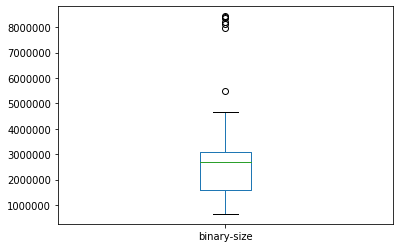

In [4]:
df['binary-size'].plot(kind='box')

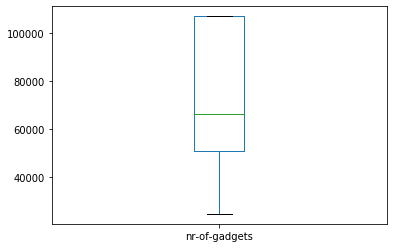

In [5]:
df['nr-of-gadgets'].plot(kind='box')

In [6]:
from sklearn import linear_model
fts = ['--disable-avs', '--disable-swscale', '--disable-lavf',
       '--disable-ffms', '--disable-gpac', '--disable-lsmash', '--enable-lto',
       '--enable-debug', '--enable-gprof', '--enable-strip', '--enable-pic',
       '--disable-asm', '--enable-shared', '--enable-static',
       '--enable-bashcompletion', '--disable-cli', '--disable-bashcompletion',
       '--disable-opencl', '--disable-gpl', '--disable-thread',
       '--disable-win32thread', '--disable-interlaced', '--system-libx264',
       '--bit-depth=8', '--bit-depth=10', '--bit-depth=all',
       '--chroma-format=400', '--chroma-format=420', '--chroma-format=422',
       '--chroma-format=444', '--chroma-format=all']


[ 1.20178727e+05 -3.98770381e+05  4.08949374e+03  6.27374245e+04
 -4.25874467e+03 -6.42187143e+05  9.09077740e+03  1.25957684e+06
 -4.68799516e+05 -1.38343269e+06 -3.43009922e+05 -7.94362789e+03
  1.89174898e-10 -2.32830644e-10 -5.26233553e+05  2.32830644e-10
 -4.47712912e+05 -4.72159442e+05  2.03690083e+05 -3.36127999e+05
 -6.86201097e+05 -8.59355134e+05  4.92526992e+05 -5.78100431e+05
 -1.02167917e+06  3.20714559e+05  4.14986269e+05  6.25377276e+05
  1.57689239e+06  7.49601383e+05  7.80687776e+05]
                          Coefficients
--enable-strip           -1.383433e+06
--bit-depth=10           -1.021679e+06
--disable-interlaced     -8.593551e+05
--disable-win32thread    -6.862011e+05
--disable-lsmash         -6.421871e+05
--bit-depth=8            -5.781004e+05
--enable-bashcompletion  -5.262336e+05
--disable-opencl         -4.721594e+05
--enable-gprof           -4.687995e+05
--disable-bashcompletion -4.477129e+05
--disable-swscale        -3.987704e+05
--enable-pic             -3

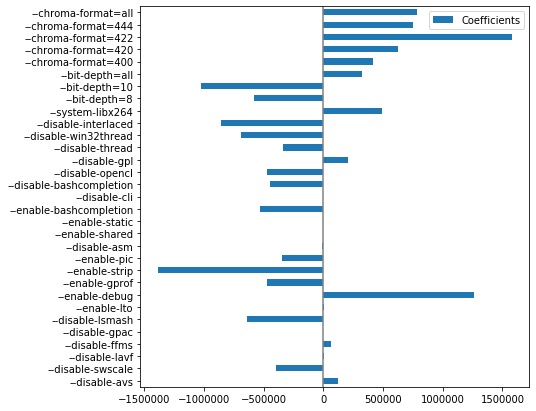

Mean squared error: 3274043538436.72
Coefficient of determination: -0.02
MAPE 0.600975522330873


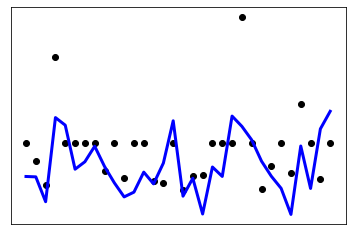

Mean squared error: 492741776020.00
Coefficient of determination: 0.85
MAPE 0.1608428644432402


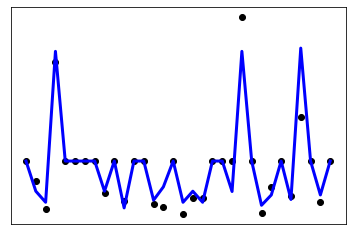

Feature: 0, --disable-avs, Score: 0.00000
Feature: 1, --disable-swscale, Score: 0.00000
Feature: 2, --disable-lavf, Score: 0.00001
Feature: 3, --disable-ffms, Score: 0.00006
Feature: 4, --disable-gpac, Score: 0.00186
Feature: 5, --disable-lsmash, Score: 0.00655
Feature: 6, --enable-lto, Score: 0.00008
Feature: 7, --enable-debug, Score: 0.29690
Feature: 8, --enable-gprof, Score: 0.00065
Feature: 9, --enable-strip, Score: 0.17999
Feature: 10, --enable-pic, Score: 0.00022
Feature: 11, --disable-asm, Score: 0.00306
Feature: 12, --enable-shared, Score: 0.00000
Feature: 13, --enable-static, Score: 0.00000
Feature: 14, --enable-bashcompletion, Score: 0.00003
Feature: 15, --disable-cli, Score: 0.00000
Feature: 16, --disable-bashcompletion, Score: 0.00009
Feature: 17, --disable-opencl, Score: 0.00021
Feature: 18, --disable-gpl, Score: 0.00123
Feature: 19, --disable-thread, Score: 0.01282
Feature: 20, --disable-win32thread, Score: 0.00073
Feature: 21, --disable-interlaced, Score: 0.00003
Feature

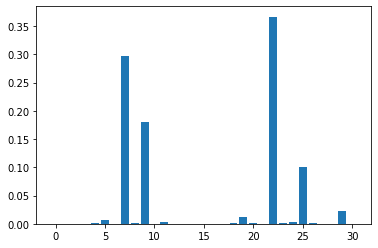

Mean squared error: 373748706856.60
Coefficient of determination: 0.88
MAPE 0.12464193517096703


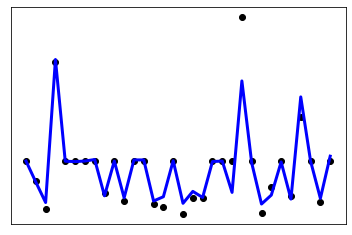

Feature: 0, --disable-avs, Score: 0.00929
Feature: 1, --disable-swscale, Score: 0.00300
Feature: 2, --disable-lavf, Score: 0.00062
Feature: 3, --disable-ffms, Score: 0.00154
Feature: 4, --disable-gpac, Score: 0.00185
Feature: 5, --disable-lsmash, Score: 0.01083
Feature: 6, --enable-lto, Score: 0.00757
Feature: 7, --enable-debug, Score: 0.22733
Feature: 8, --enable-gprof, Score: 0.00203
Feature: 9, --enable-strip, Score: 0.19698
Feature: 10, --enable-pic, Score: 0.02247
Feature: 11, --disable-asm, Score: 0.00731
Feature: 12, --enable-shared, Score: 0.00000
Feature: 13, --enable-static, Score: 0.00000
Feature: 14, --enable-bashcompletion, Score: 0.00063
Feature: 15, --disable-cli, Score: 0.00000
Feature: 16, --disable-bashcompletion, Score: 0.00147
Feature: 17, --disable-opencl, Score: 0.00620
Feature: 18, --disable-gpl, Score: 0.00246
Feature: 19, --disable-thread, Score: 0.01516
Feature: 20, --disable-win32thread, Score: 0.01412
Feature: 21, --disable-interlaced, Score: 0.02287
Feature

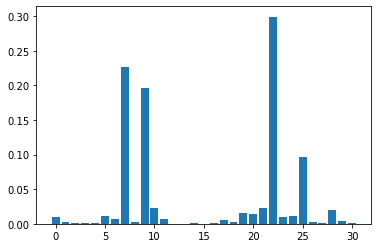

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import graphviz 

def mean_absolute_percentage_error(y_pred, y_true):
    return np.average(np.abs(y_pred - y_true) / np.abs(y_true))

def eval_model(target, y_pred): 
    y_test = df_test[target]
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
    
    print("MAPE", mean_absolute_percentage_error(y_pred, y_test))

    # Plot outputs
    plt.scatter(df_test[fts].index, y_test,  color='black')
    plt.plot(df_test[fts].index, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

def mk_linear_regression(target):
    regr = linear_model.LinearRegression()
    regr.fit(df[fts], df[target])
    print(regr.coef_)
    coeffs = pd.DataFrame(regr.coef_, fts, columns=['Coefficients'])
    print(coeffs.sort_values(by="Coefficients"))
    coeffs.plot(kind='barh', figsize=(9, 7))
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)
    plt.show()
    
    y_pred = regr.predict(df_test[fts])
    eval_model(target, y_pred)
    



def mk_treepredictor(target, decision_tree): 
    if decision_tree:
        clf = tree.DecisionTreeRegressor()
    else:
        clf = RandomForestRegressor() 
    clf = clf.fit(df[fts], df[target])

    if decision_tree:
        dot_data = tree.export_graphviz(clf, out_file=None, feature_names=fts,  
                      filled=True, rounded=True,  
                      special_characters=True)
        graph = graphviz.Source(dot_data) 
        graph.render("x264")
                   
    
    y_pred = clf.predict(df_test[fts])
    eval_model(target, y_pred)
    
    importance = clf.feature_importances_
    for i, v in enumerate(importance):
        print('Feature: %d, %s, Score: %.5f' % (i, df.columns[i], v))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
mk_linear_regression('binary-size')
mk_treepredictor('binary-size', True)
mk_treepredictor('binary-size', False)

[ 8.07330132e+02  5.52439488e+03 -2.30931222e+03 -2.68104008e+03
  4.19415116e+02 -7.85841411e+03  4.08625003e+03 -8.65953404e+02
 -2.15497754e+01 -3.20080219e+03  7.18129339e+02 -8.41360693e+03
  1.09139364e-11 -3.63797881e-12  2.47247093e+03  3.63797881e-12
  2.09149891e+03 -1.60935660e+03 -1.92828996e+03  3.21960571e+03
 -2.20198106e+03 -1.49243827e+03  5.12840056e+04 -1.59817639e+04
 -1.76351951e+04 -3.84445074e+03 -3.85168183e+03 -3.65349474e+03
 -3.96837909e+03 -5.43255459e+03 -2.76101904e+02]
                          Coefficients
--bit-depth=10           -1.763520e+04
--bit-depth=8            -1.598176e+04
--disable-asm            -8.413607e+03
--disable-lsmash         -7.858414e+03
--chroma-format=444      -5.432555e+03
--chroma-format=422      -3.968379e+03
--chroma-format=400      -3.851682e+03
--bit-depth=all          -3.844451e+03
--chroma-format=420      -3.653495e+03
--enable-strip           -3.200802e+03
--disable-ffms           -2.681040e+03
--disable-lavf           -2

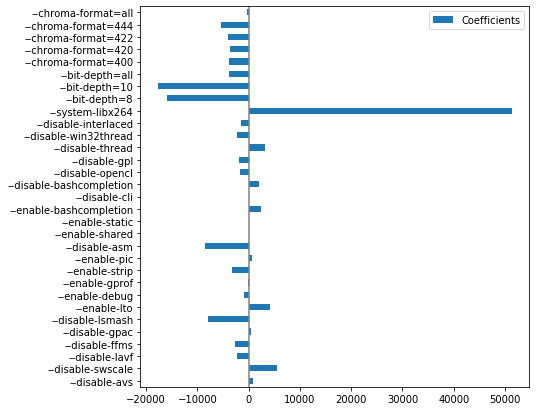

Mean squared error: 97263055.15
Coefficient of determination: 0.90
MAPE 0.14016686239601073


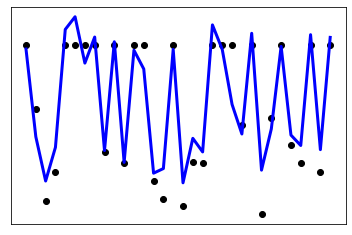

Mean squared error: 92627232.41
Coefficient of determination: 0.90
MAPE 0.063373446649716


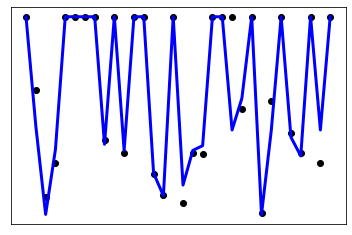

Feature: 0, --disable-avs, Score: 0.00058
Feature: 1, --disable-swscale, Score: 0.00015
Feature: 2, --disable-lavf, Score: 0.00000
Feature: 3, --disable-ffms, Score: 0.00045
Feature: 4, --disable-gpac, Score: 0.00008
Feature: 5, --disable-lsmash, Score: 0.05059
Feature: 6, --enable-lto, Score: 0.00004
Feature: 7, --enable-debug, Score: 0.00662
Feature: 8, --enable-gprof, Score: 0.00016
Feature: 9, --enable-strip, Score: 0.00054
Feature: 10, --enable-pic, Score: 0.00278
Feature: 11, --disable-asm, Score: 0.02638
Feature: 12, --enable-shared, Score: 0.00000
Feature: 13, --enable-static, Score: 0.00000
Feature: 14, --enable-bashcompletion, Score: 0.00303
Feature: 15, --disable-cli, Score: 0.00000
Feature: 16, --disable-bashcompletion, Score: 0.00287
Feature: 17, --disable-opencl, Score: 0.00008
Feature: 18, --disable-gpl, Score: 0.00049
Feature: 19, --disable-thread, Score: 0.00046
Feature: 20, --disable-win32thread, Score: 0.00000
Feature: 21, --disable-interlaced, Score: 0.00000
Feature

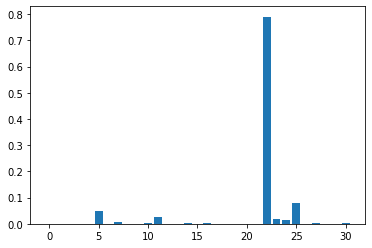

Mean squared error: 107840032.27
Coefficient of determination: 0.89
MAPE 0.09972114267190495


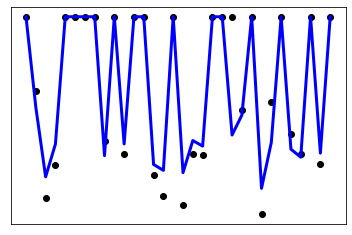

Feature: 0, --disable-avs, Score: 0.00281
Feature: 1, --disable-swscale, Score: 0.00133
Feature: 2, --disable-lavf, Score: 0.00179
Feature: 3, --disable-ffms, Score: 0.00127
Feature: 4, --disable-gpac, Score: 0.00171
Feature: 5, --disable-lsmash, Score: 0.02563
Feature: 6, --enable-lto, Score: 0.00433
Feature: 7, --enable-debug, Score: 0.01179
Feature: 8, --enable-gprof, Score: 0.00541
Feature: 9, --enable-strip, Score: 0.00180
Feature: 10, --enable-pic, Score: 0.00143
Feature: 11, --disable-asm, Score: 0.02111
Feature: 12, --enable-shared, Score: 0.00000
Feature: 13, --enable-static, Score: 0.00000
Feature: 14, --enable-bashcompletion, Score: 0.00166
Feature: 15, --disable-cli, Score: 0.00000
Feature: 16, --disable-bashcompletion, Score: 0.00253
Feature: 17, --disable-opencl, Score: 0.00224
Feature: 18, --disable-gpl, Score: 0.00543
Feature: 19, --disable-thread, Score: 0.00213
Feature: 20, --disable-win32thread, Score: 0.00389
Feature: 21, --disable-interlaced, Score: 0.00127
Feature

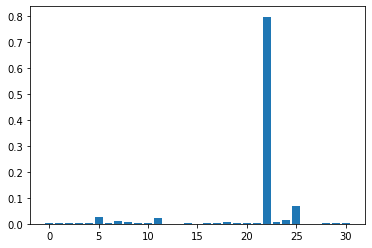

In [8]:
mk_linear_regression(target='nr-of-gadgets')
mk_treepredictor('nr-of-gadgets', True)
mk_treepredictor('nr-of-gadgets', False)